<a href="https://colab.research.google.com/github/KalpitWalekar/Prepinsta/blob/main/Prepinsta_Week8_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# @title Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import datetime

In [3]:
# @title Importing Daily Activities file
daily_activity = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/dailyActivity_merged.csv")
#Converted the column to datetime dtype, rest data is clean
daily_activity.ActivityDate = pd.to_datetime(daily_activity.ActivityDate)
daily_activity.columns = daily_activity.columns.str.lower()
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        940 non-null    int64         
 1   activitydate              940 non-null    datetime64[ns]
 2   totalsteps                940 non-null    int64         
 3   totaldistance             940 non-null    float64       
 4   trackerdistance           940 non-null    float64       
 5   loggedactivitiesdistance  940 non-null    float64       
 6   veryactivedistance        940 non-null    float64       
 7   moderatelyactivedistance  940 non-null    float64       
 8   lightactivedistance       940 non-null    float64       
 9   sedentaryactivedistance   940 non-null    float64       
 10  veryactiveminutes         940 non-null    int64         
 11  fairlyactiveminutes       940 non-null    int64         
 12  lightlyactiveminutes  

In [4]:
# @title Importing Daily Calories file
daily_calories = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/dailyCalories_merged.csv")
#Converted the column to datetime dtype, rest data is clean
daily_calories.ActivityDay = pd.to_datetime(daily_calories.ActivityDay)
daily_calories.columns = daily_calories.columns.str.lower()
daily_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           940 non-null    int64         
 1   activityday  940 non-null    datetime64[ns]
 2   calories     940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


In [5]:
daily_calories.head()

,id,activityday,calories
0,1503960366,2016-04-12,1985
1,1503960366,2016-04-13,1797
2,1503960366,2016-04-14,1776
3,1503960366,2016-04-15,1745
4,1503960366,2016-04-16,1863


In [6]:
# @title Importing Daily Intensities file
daily_intensities = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/dailyIntensities_merged.csv")
#Converted the column to datetime dtype, rest data is clean
daily_intensities.ActivityDay = pd.to_datetime(daily_intensities.ActivityDay)
daily_intensities.columns = daily_intensities.columns.str.lower()
daily_intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        940 non-null    int64         
 1   activityday               940 non-null    datetime64[ns]
 2   sedentaryminutes          940 non-null    int64         
 3   lightlyactiveminutes      940 non-null    int64         
 4   fairlyactiveminutes       940 non-null    int64         
 5   veryactiveminutes         940 non-null    int64         
 6   sedentaryactivedistance   940 non-null    float64       
 7   lightactivedistance       940 non-null    float64       
 8   moderatelyactivedistance  940 non-null    float64       
 9   veryactivedistance        940 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 73.6 KB


In [7]:
daily_intensities.head()

,id,activityday,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,sedentaryactivedistance,lightactivedistance,moderatelyactivedistance,veryactivedistance
0,1503960366,2016-04-12,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,2016-04-13,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,2016-04-14,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,2016-04-15,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,2016-04-16,773,221,10,36,0.0,5.04,0.41,2.71


In [8]:
# @title Importing Daily Steps file
daily_steps = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/dailySteps_merged.csv")
#Converted the column to datetime dtype, rest data is clean
daily_steps.ActivityDay = pd.to_datetime(daily_steps.ActivityDay)
daily_steps.columns = daily_steps.columns.str.lower()
daily_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           940 non-null    int64         
 1   activityday  940 non-null    datetime64[ns]
 2   steptotal    940 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 22.2 KB


In [9]:
daily_steps.head()

,id,activityday,steptotal
0,1503960366,2016-04-12,13162
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9762
4,1503960366,2016-04-16,12669


In [10]:
# @title Merging all three Daily files to create daily_activity_merged
daily_activity_merged = pd.merge(daily_calories,daily_intensities,how='left',on=['id','activityday'])
daily_activity_merged = pd.merge(daily_activity_merged,daily_steps,how='left',on=['id','activityday'])
daily_activity_merged.head()

,id,activityday,calories,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,sedentaryactivedistance,lightactivedistance,moderatelyactivedistance,veryactivedistance,steptotal
0,1503960366,2016-04-12,1985,728,328,13,25,0.0,6.06,0.55,1.88,13162
1,1503960366,2016-04-13,1797,776,217,19,21,0.0,4.71,0.69,1.57,10735
2,1503960366,2016-04-14,1776,1218,181,11,30,0.0,3.91,0.40,2.44,10460
3,1503960366,2016-04-15,1745,726,209,34,29,0.0,2.83,1.26,2.14,9762
4,1503960366,2016-04-16,1863,773,221,10,36,0.0,5.04,0.41,2.71,12669


In [11]:
# @title Importing Heartrate Second file
heartrate_second = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/heartrate_seconds_merged.csv")
heartrate_second.columns = heartrate_second.columns.str.lower()
heartrate_second.time = pd.to_datetime(heartrate_second.time)
heartrate_second.head()

,id,time,value
0,2022484408,2016-04-12 07:21:00,97
1,2022484408,2016-04-12 07:21:05,102
2,2022484408,2016-04-12 07:21:10,105
3,2022484408,2016-04-12 07:21:20,103
4,2022484408,2016-04-12 07:21:25,101


In [12]:
heartrate_second['heart_date'] = heartrate_second['time'].dt.date
heartrate_second['heart_date'] = pd.to_datetime(heartrate_second['heart_date'])
heartrate_second['heart_time'] = heartrate_second['time'].dt.time
heartrate_second.drop(columns=['time'], inplace=True)

heartrate_second = heartrate_second[['id', 'heart_date', 'heart_time', 'value']]
heartrate_second.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   id          int64         
 1   heart_date  datetime64[ns]
 2   heart_time  object        
 3   value       int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 75.8+ MB


In [13]:
# @title Importing Hourly Calories file
hourly_calories = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/hourlyCalories_merged.csv")
hourly_calories.columns = hourly_calories.columns.str.lower()
hourly_calories.activityhour = pd.to_datetime(hourly_calories.activityhour)
hourly_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            22099 non-null  int64         
 1   activityhour  22099 non-null  datetime64[ns]
 2   calories      22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [14]:
hourly_calories.head()

,id,activityhour,calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


In [15]:
# @title Importing Hourly Intensities file
hourly_intensities = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/hourlyIntensities_merged.csv")
hourly_intensities.columns = hourly_intensities.columns.str.lower()
hourly_intensities.activityhour = pd.to_datetime(hourly_intensities.activityhour)
hourly_intensities.averageintensity = round(hourly_intensities.averageintensity, 3)
hourly_intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                22099 non-null  int64         
 1   activityhour      22099 non-null  datetime64[ns]
 2   totalintensity    22099 non-null  int64         
 3   averageintensity  22099 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 690.7 KB


In [16]:
hourly_intensities.head()

,id,activityhour,totalintensity,averageintensity
0,1503960366,2016-04-12 00:00:00,20,0.333
1,1503960366,2016-04-12 01:00:00,8,0.133
2,1503960366,2016-04-12 02:00:00,7,0.117
3,1503960366,2016-04-12 03:00:00,0,0.000
4,1503960366,2016-04-12 04:00:00,0,0.000


In [17]:
# @title Importing Hourly Steps file
hourly_steps = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/hourlySteps_merged.csv")
hourly_steps.columns = hourly_steps.columns.str.lower()
hourly_steps.activityhour = pd.to_datetime(hourly_steps.activityhour)
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            22099 non-null  int64         
 1   activityhour  22099 non-null  datetime64[ns]
 2   steptotal     22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [18]:
hourly_steps.head()

,id,activityhour,steptotal
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151
3,1503960366,2016-04-12 03:00:00,0
4,1503960366,2016-04-12 04:00:00,0


In [19]:
# @title Merging Hourly files to create hourly_activity_merged
hourly_activity_merged = pd.merge(hourly_calories,hourly_intensities,how='left',on=['id','activityhour'])
hourly_activity_merged = pd.merge(hourly_activity_merged,hourly_steps,how='left',on=['id','activityhour'])
hourly_activity_merged['activityhour_date'] = hourly_activity_merged['activityhour'].dt.date
hourly_activity_merged['activityhour_date'] = pd.to_datetime(hourly_activity_merged['activityhour_date'])
hourly_activity_merged['activityhour_time'] = hourly_activity_merged['activityhour'].dt.time
hourly_activity_merged.drop(columns=['activityhour'], inplace=True)

hourly_activity_merged = hourly_activity_merged[['id', 'activityhour_date', 'activityhour_time', 'calories', 'totalintensity', 'averageintensity']]
hourly_activity_merged.head()

,id,activityhour_date,activityhour_time,calories,totalintensity,averageintensity
0,1503960366,2016-04-12,00:00:00,81,20,0.333
1,1503960366,2016-04-12,01:00:00,61,8,0.133
2,1503960366,2016-04-12,02:00:00,59,7,0.117
3,1503960366,2016-04-12,03:00:00,47,0,0.000
4,1503960366,2016-04-12,04:00:00,48,0,0.000


In [20]:
# @title Importing Minute Calories file
minute_calories_narrow = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/minuteCaloriesNarrow_merged.csv")
minute_calories_narrow.columns = minute_calories_narrow.columns.str.lower()
minute_calories_narrow.activityminute = pd.to_datetime(minute_calories_narrow.activityminute)
minute_calories_narrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   id              1325580 non-null  int64         
 1   activityminute  1325580 non-null  datetime64[ns]
 2   calories        1325580 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 30.3 MB


In [21]:
minute_calories_narrow.head()

,id,activityminute,calories
0,1503960366,2016-04-12 00:00:00,0.7865
1,1503960366,2016-04-12 00:01:00,0.7865
2,1503960366,2016-04-12 00:02:00,0.7865
3,1503960366,2016-04-12 00:03:00,0.7865
4,1503960366,2016-04-12 00:04:00,0.7865


In [22]:
minute_calories_wide = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/minuteIntensitiesWide_merged.csv")
minute_calories_wide.columns = minute_calories_wide.columns.str.lower()
minute_calories_wide.columns = minute_calories_wide.columns.str.replace("intensity", "")
minute_calories_wide.activityhour = pd.to_datetime(minute_calories_wide.activityhour)
minute_calories_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            21645 non-null  int64         
 1   activityhour  21645 non-null  datetime64[ns]
 2   00            21645 non-null  int64         
 3   01            21645 non-null  int64         
 4   02            21645 non-null  int64         
 5   03            21645 non-null  int64         
 6   04            21645 non-null  int64         
 7   05            21645 non-null  int64         
 8   06            21645 non-null  int64         
 9   07            21645 non-null  int64         
 10  08            21645 non-null  int64         
 11  09            21645 non-null  int64         
 12  10            21645 non-null  int64         
 13  11            21645 non-null  int64         
 14  12            21645 non-null  int64         
 15  13            21645 non-null  int64 

In [23]:
minute_calories_wide.head()

,id,activityhour,00,01,02,03,04,05,06,07,...,50,51,52,53,54,55,56,57,58,59
0,1503960366,2016-04-13 00:00:00,1,1,0,0,0,1,0,1,...,0,1,1,0,1,1,0,0,0,0
1,1503960366,2016-04-13 01:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,2016-04-13 02:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,2016-04-13 03:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,2016-04-13 04:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# @title Importing Minute Intensities file
minute_intensities_narrow = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/minuteIntensitiesNarrow_merged.csv")
minute_intensities_narrow.columns = minute_intensities_narrow.columns.str.lower()
minute_intensities_narrow.activityminute = pd.to_datetime(minute_intensities_narrow.activityminute)
minute_intensities_narrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   id              1325580 non-null  int64         
 1   activityminute  1325580 non-null  datetime64[ns]
 2   intensity       1325580 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 30.3 MB


In [25]:
minute_intensities_narrow.head()

,id,activityminute,intensity
0,1503960366,2016-04-12 00:00:00,0
1,1503960366,2016-04-12 00:01:00,0
2,1503960366,2016-04-12 00:02:00,0
3,1503960366,2016-04-12 00:03:00,0
4,1503960366,2016-04-12 00:04:00,0


In [26]:
minute_intensities_wide = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/minuteIntensitiesWide_merged.csv")
minute_intensities_wide.columns = minute_intensities_wide.columns.str.lower()
minute_intensities_wide.activityhour = pd.to_datetime(minute_intensities_wide.activityhour)
minute_intensities_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            21645 non-null  int64         
 1   activityhour  21645 non-null  datetime64[ns]
 2   intensity00   21645 non-null  int64         
 3   intensity01   21645 non-null  int64         
 4   intensity02   21645 non-null  int64         
 5   intensity03   21645 non-null  int64         
 6   intensity04   21645 non-null  int64         
 7   intensity05   21645 non-null  int64         
 8   intensity06   21645 non-null  int64         
 9   intensity07   21645 non-null  int64         
 10  intensity08   21645 non-null  int64         
 11  intensity09   21645 non-null  int64         
 12  intensity10   21645 non-null  int64         
 13  intensity11   21645 non-null  int64         
 14  intensity12   21645 non-null  int64         
 15  intensity13   21645 non-null  int64 

In [27]:
minute_intensities_wide.head()

,id,activityhour,intensity00,intensity01,intensity02,intensity03,intensity04,intensity05,intensity06,intensity07,...,intensity50,intensity51,intensity52,intensity53,intensity54,intensity55,intensity56,intensity57,intensity58,intensity59
0,1503960366,2016-04-13 00:00:00,1,1,0,0,0,1,0,1,...,0,1,1,0,1,1,0,0,0,0
1,1503960366,2016-04-13 01:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,2016-04-13 02:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,2016-04-13 03:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,2016-04-13 04:00:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# @title Importing Minute Mets file
minute_mets_narrow = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/minuteMETsNarrow_merged.csv")
minute_mets_narrow.columns = minute_mets_narrow.columns.str.lower()
minute_mets_narrow.activityminute = pd.to_datetime(minute_mets_narrow.activityminute)
minute_mets_narrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   id              1325580 non-null  int64         
 1   activityminute  1325580 non-null  datetime64[ns]
 2   mets            1325580 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 30.3 MB


In [29]:
minute_mets_narrow.head()

,id,activityminute,mets
0,1503960366,2016-04-12 00:00:00,10
1,1503960366,2016-04-12 00:01:00,10
2,1503960366,2016-04-12 00:02:00,10
3,1503960366,2016-04-12 00:03:00,10
4,1503960366,2016-04-12 00:04:00,10


In [31]:
# @title Importing Minutes Sleep file
minute_sleep = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/minuteSleep_merged.csv")
minute_sleep.columns = minute_sleep.columns.str.lower()
minute_sleep.date = pd.to_datetime(minute_sleep.date)
minute_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188521 entries, 0 to 188520
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   id      188521 non-null  int64         
 1   date    188521 non-null  datetime64[ns]
 2   value   188521 non-null  int64         
 3   logid   188521 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 5.8 MB


In [32]:
minute_sleep.head()

,id,date,value,logid
0,1503960366,2016-04-12 02:47:30,3,11380564589
1,1503960366,2016-04-12 02:48:30,2,11380564589
2,1503960366,2016-04-12 02:49:30,1,11380564589
3,1503960366,2016-04-12 02:50:30,1,11380564589
4,1503960366,2016-04-12 02:51:30,1,11380564589


In [33]:
# @title Importing Minute Step file
minute_step_narrow = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/minuteStepsNarrow_merged.csv")
minute_step_narrow.columns = minute_step_narrow.columns.str.lower()
minute_step_narrow.activityminute = pd.to_datetime(minute_step_narrow.activityminute)
minute_step_narrow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   id              1325580 non-null  int64         
 1   activityminute  1325580 non-null  datetime64[ns]
 2   steps           1325580 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 30.3 MB


In [35]:
minute_step_narrow.head()

,id,activityminute,steps
0,1503960366,2016-04-12 00:00:00,0
1,1503960366,2016-04-12 00:01:00,0
2,1503960366,2016-04-12 00:02:00,0
3,1503960366,2016-04-12 00:03:00,0
4,1503960366,2016-04-12 00:04:00,0


In [34]:
minute_step_wide = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/minuteStepsWide_merged.csv")
minute_step_wide.columns = minute_step_wide.columns.str.lower()
minute_step_wide.activityhour = pd.to_datetime(minute_step_wide.activityhour)
minute_step_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            21645 non-null  int64         
 1   activityhour  21645 non-null  datetime64[ns]
 2   steps00       21645 non-null  int64         
 3   steps01       21645 non-null  int64         
 4   steps02       21645 non-null  int64         
 5   steps03       21645 non-null  int64         
 6   steps04       21645 non-null  int64         
 7   steps05       21645 non-null  int64         
 8   steps06       21645 non-null  int64         
 9   steps07       21645 non-null  int64         
 10  steps08       21645 non-null  int64         
 11  steps09       21645 non-null  int64         
 12  steps10       21645 non-null  int64         
 13  steps11       21645 non-null  int64         
 14  steps12       21645 non-null  int64         
 15  steps13       21645 non-null  int64 

In [36]:
# @title Merging Minute files to create minute_activities_merged
minute_activity_merged = pd.merge(minute_calories_narrow,minute_intensities_narrow,how='left',on=['id','activityminute'])
minute_activity_merged = pd.merge(minute_activity_merged,minute_step_narrow,how='left',on=['id','activityminute'])
minute_activity_merged = pd.merge(minute_activity_merged,minute_mets_narrow,how='left',on=['id','activityminute'])
minute_activity_merged = pd.merge(minute_activity_merged,minute_mets_narrow,how='left',on=['id','activityminute'])

minute_activity_merged['activityminute_date'] = minute_activity_merged['activityminute'].dt.date
minute_activity_merged['activityminute_date'] = pd.to_datetime(minute_activity_merged['activityminute_date'])
minute_activity_merged['activityminute_time'] = minute_activity_merged['activityminute'].dt.time
minute_activity_merged.drop(columns=['activityminute'], inplace=True)

minute_activity_merged = minute_activity_merged[['id', 'activityminute_date', 'activityminute_time', 'calories', 'intensity', 'steps','mets_x','mets_y']]
minute_activity_merged.head()

,id,activityminute_date,activityminute_time,calories,intensity,steps,mets_x,mets_y
0,1503960366,2016-04-12,00:00:00,0.7865,0,0,10,10
1,1503960366,2016-04-12,00:01:00,0.7865,0,0,10,10
2,1503960366,2016-04-12,00:02:00,0.7865,0,0,10,10
3,1503960366,2016-04-12,00:03:00,0.7865,0,0,10,10
4,1503960366,2016-04-12,00:04:00,0.7865,0,0,10,10


In [37]:
# @title Importing Sleep Day file
sleep_day = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/sleepDay_merged.csv")
sleep_day.columns = sleep_day.columns.str.lower()
sleep_day.sleepday = pd.to_datetime(sleep_day.sleepday)
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  413 non-null    int64         
 1   sleepday            413 non-null    datetime64[ns]
 2   totalsleeprecords   413 non-null    int64         
 3   totalminutesasleep  413 non-null    int64         
 4   totaltimeinbed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [38]:
sleep_day.head()

,id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [39]:
# @title Importing Weight Log file
weight_log_info = pd.read_csv("/content/drive/MyDrive/python_docs/Capstone/weightLogInfo_merged.csv")
weight_log_info.columns = weight_log_info.columns.str.lower()
weight_log_info.date = pd.to_datetime(weight_log_info.date)
weight_log_info['weight_date'] = weight_log_info['date'].dt.date
weight_log_info['weight_date'] = pd.to_datetime(weight_log_info['weight_date'])
weight_log_info['weight_time'] = weight_log_info['date'].dt.time
weight_log_info.drop(columns=['date'], inplace=True)

weight_log_info = weight_log_info[['id', 'weight_date', 'weight_time', 'weightkg', 'weightpounds', 'fat','bmi','ismanualreport','logid']]
weight_log_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              67 non-null     int64         
 1   weight_date     67 non-null     datetime64[ns]
 2   weight_time     67 non-null     object        
 3   weightkg        67 non-null     float64       
 4   weightpounds    67 non-null     float64       
 5   fat             2 non-null      float64       
 6   bmi             67 non-null     float64       
 7   ismanualreport  67 non-null     bool          
 8   logid           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 4.4+ KB


In [40]:
weight_log_info.head()

,id,weight_date,weight_time,weightkg,weightpounds,fat,bmi,ismanualreport,logid
0,1503960366,2016-05-02,23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03,23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13,01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21,23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12,23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [41]:
# @title Exporting these processed files to create Dashboards
daily_activity_merged.to_csv('/content/drive/MyDrive/python_docs/Capstone/Merged_files/daily_activity_merged.csv',index=False)
hourly_activity_merged.to_csv('/content/drive/MyDrive/python_docs/Capstone/Merged_files/hourly_activity_merged.csv',index=False)
minute_activity_merged.to_csv('/content/drive/MyDrive/python_docs/Capstone/Merged_files/minute_activity_merged.csv',index=False)
weight_log_info.to_csv('/content/drive/MyDrive/python_docs/Capstone/Merged_files/weight_log_info.csv',index=False)
sleep_day.to_csv('/content/drive/MyDrive/python_docs/Capstone/Merged_files/sleep_day.csv',index=False)
heartrate_second.to_csv('/content/drive/MyDrive/python_docs/Capstone/Merged_files/heartrate_second.csv',index=False)

#EDA

##Daily Activities

In [42]:
daily_activity_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 0 to 939
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        940 non-null    int64         
 1   activityday               940 non-null    datetime64[ns]
 2   calories                  940 non-null    int64         
 3   sedentaryminutes          940 non-null    int64         
 4   lightlyactiveminutes      940 non-null    int64         
 5   fairlyactiveminutes       940 non-null    int64         
 6   veryactiveminutes         940 non-null    int64         
 7   sedentaryactivedistance   940 non-null    float64       
 8   lightactivedistance       940 non-null    float64       
 9   moderatelyactivedistance  940 non-null    float64       
 10  veryactivedistance        940 non-null    float64       
 11  steptotal                 940 non-null    int64         
dtypes: datetime64[ns](1), 

In [43]:
daily_activity_merged.head()

,id,activityday,calories,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,sedentaryactivedistance,lightactivedistance,moderatelyactivedistance,veryactivedistance,steptotal
0,1503960366,2016-04-12,1985,728,328,13,25,0.0,6.06,0.55,1.88,13162
1,1503960366,2016-04-13,1797,776,217,19,21,0.0,4.71,0.69,1.57,10735
2,1503960366,2016-04-14,1776,1218,181,11,30,0.0,3.91,0.40,2.44,10460
3,1503960366,2016-04-15,1745,726,209,34,29,0.0,2.83,1.26,2.14,9762
4,1503960366,2016-04-16,1863,773,221,10,36,0.0,5.04,0.41,2.71,12669


In [44]:
#Statistical analysis of daily activities data
daily_activity_merged.describe()

,id,calories,sedentaryminutes,lightlyactiveminutes,fairlyactiveminutes,veryactiveminutes,sedentaryactivedistance,lightactivedistance,moderatelyactivedistance,veryactivedistance,steptotal
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2303.609574,991.210638,192.812766,13.564894,21.164894,0.001606,3.340819,0.567543,1.502681,7637.910638
std,2.424805e+09,718.166862,301.267437,109.174700,19.987404,32.844803,0.007346,2.040655,0.883580,2.658941,5087.150742
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,1828.500000,729.750000,127.000000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,3789.750000
50%,4.445115e+09,2134.000000,1057.500000,199.000000,6.000000,4.000000,0.000000,3.365000,0.240000,0.210000,7405.500000
75%,6.962181e+09,2793.250000,1229.500000,264.000000,19.000000,32.000000,0.000000,4.782500,0.800000,2.052500,10727.000000
max,8.877689e+09,4900.000000,1440.000000,518.000000,143.000000,210.000000,0.110000,10.710000,6.480000,21.920000,36019.000000


# **Insights:**


*   **Calories**: On average, individuals burned approximately 2304 calories.
*   **Sedentary Minutes**: Individuals spent around 991 minutes (or roughly 16.5 hours) in sedentary activities per day.
*   **Fairly Active Minutes**: Individuals engaged in fairly active activities for about 14 minutes on average.
*   **Very Active Minutes**: The average duration of very active activities was around 21 minutes.
*   **Sedentary Active Distance**: Sedentary active distance is negligible, averaging at approximately 0.0016 units.
*   **Light Active Distance**: Individuals covered around 3.34 units of distance in light activity.
*   **Moderately Active Distance**: The average distance covered in moderately active activities was approximately 0.57 units.
*   **Very Active Distance**: Individuals covered about 1.5 units of distance in very active activities.
*   **Step Total**: On average, individuals took approximately 7638 steps per day.


In [45]:
# Weekly data analysis
weekly_activity_metrics = daily_activity_merged.groupby(daily_activity_merged['activityday'].dt.week)['calories', 'steptotal'].agg(['sum', 'mean', 'std'])
weekly_activity_metrics.head()

<ipython-input-45-1f26838e0767>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekly_activity_metrics = daily_activity_merged.groupby(daily_activity_merged['activityday'].dt.week)['calories', 'steptotal'].agg(['sum', 'mean', 'std'])
<ipython-input-45-1f26838e0767>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  weekly_activity_metrics = daily_activity_merged.groupby(daily_activity_merged['activityday'].dt.week)['calories', 'steptotal'].agg(['sum', 'mean', 'std'])


calories                          steptotal               \
                 sum         mean         std       sum         mean   
activityday                                                            
15            457799  2335.709184  708.809238   1496358  7634.479592   
16            528826  2360.830357  689.911035   1777299  7934.370536   
17            511645  2315.135747  677.505491   1705934  7719.158371   
18            469610  2336.368159  681.664378   1516993  7547.228856   
19            197513  2015.438776  890.697689    683052  6969.918367   

                          
                     std  
activityday               
15           5108.349940  
16           5094.634246  
17           5282.308915  
18           4898.202727  
19           4995.103870

<ipython-input-46-7c1ce845f0d4>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(daily_activity_merged['calories'], color="b", shade=True)
<ipython-input-46-7c1ce845f0d4>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(daily_activity_merged['steptotal'], color="g", shade=True)


<Axes: xlabel='calories', ylabel='Density'>

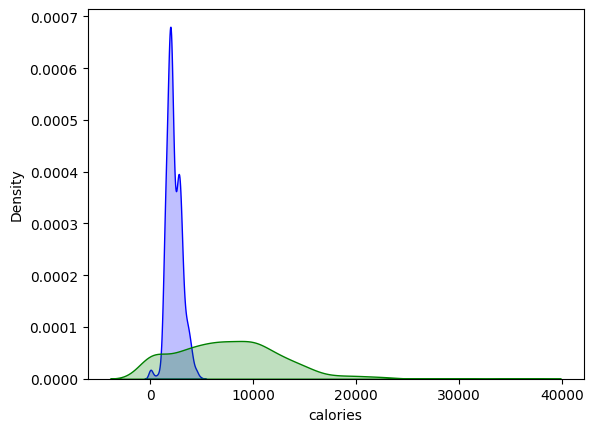

In [46]:
# @title Plot comparing Daily Total Steps vs Daily Calories Burnt
sb.kdeplot(daily_activity_merged['calories'], color="b", shade=True)
sb.kdeplot(daily_activity_merged['steptotal'], color="g", shade=True)

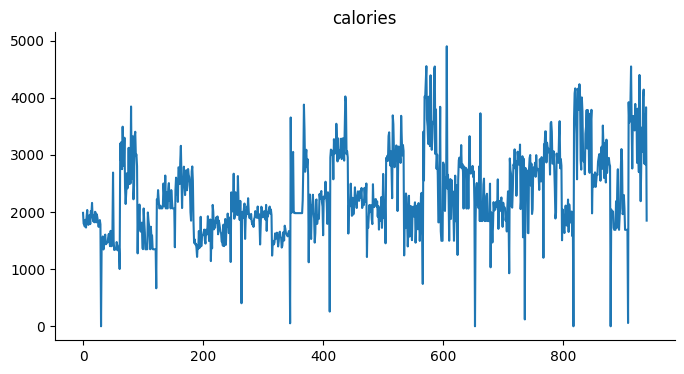

In [47]:
# Plotting Calories
daily_activity_merged['calories'].plot(kind='line', figsize=(8, 4), title='calories')
plt.gca().spines[['top', 'right']].set_visible(False)

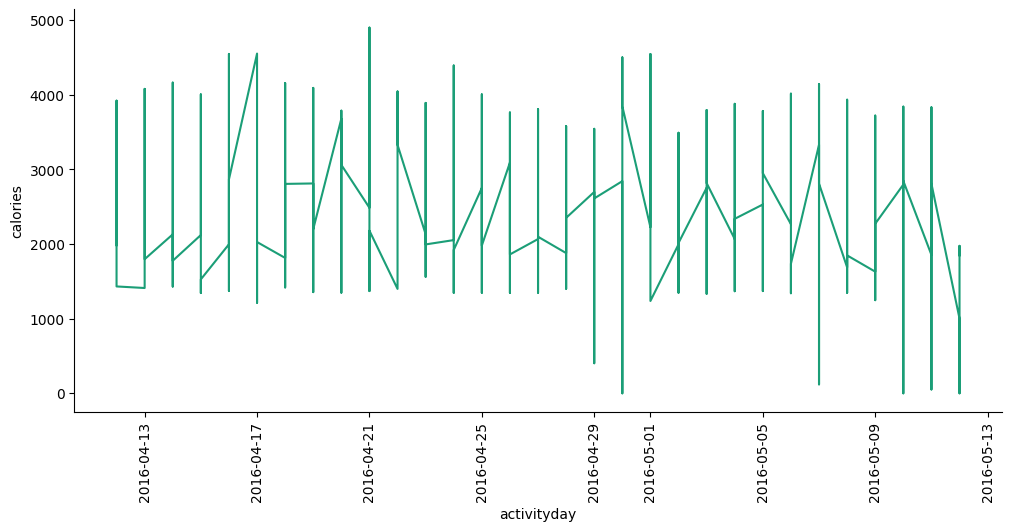

In [48]:
#Plotting Calories
def _plot_series(series, series_name, series_index=0):
    palette = list(sb.palettes.mpl_palette('Dark2'))
    xs = series['activityday']
    ys = series['calories']

    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2),layout='constrained')
df_sorted = daily_activity_merged.sort_values('activityday', ascending=True)
_plot_series(df_sorted, '')
sb.despine(fig=fig, ax=ax)
plt.xlabel('activityday')
plt.xticks(rotation=90)
_ = plt.ylabel('calories')

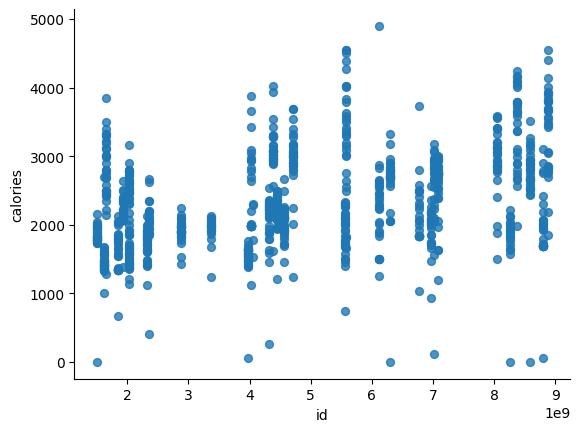

In [50]:
# Distribution of Calories
daily_activity_merged.plot(kind='scatter', x='id', y='calories', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [51]:
data = daily_activity_merged

correlation_matrix = data.corr()
print(correlation_matrix)

                                id  calories  sedentaryminutes  \
id                        1.000000  0.396671         -0.043319   
calories                  0.396671  1.000000         -0.106973   
sedentaryminutes         -0.043319 -0.106973          1.000000   
lightlyactiveminutes     -0.098754  0.286718         -0.437104   
fairlyactiveminutes       0.051158  0.297623         -0.237446   
veryactiveminutes         0.303608  0.615838         -0.164671   
sedentaryactivedistance  -0.015698  0.043652          0.035475   
lightactivedistance       0.019629  0.466917         -0.413552   
moderatelyactivedistance  0.026665  0.216790         -0.221436   
veryactivedistance        0.308691  0.491959         -0.061754   
steptotal                 0.185721  0.591568         -0.327484   

                          lightlyactiveminutes  fairlyactiveminutes  \
id                                   -0.098754             0.051158   
calories                              0.286718             0.2976

<ipython-input-51-b707c82c1132>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


#**Insights:**

**Strong Positive Correlations:**
There is a strong positive correlation between:

*Calories burned and lightly active minutes (0.29)*

*Calories burned and fairly active minutes (0.30)*

*Calories burned and very active minutes (0.62)*

*Calories burned and light active distance (0.47)*

*Calories burned and very active distance (0.49)*

*Lightly active minutes and fairly active minutes (0.15)*

*Lightly active minutes and light active distance (0.89)*

*Lightly active minutes and step total (0.57)*

*Fairly active minutes and moderately active minutes (0.95)*

*Fairly active minutes and step total (0.50)*

*Very active minutes and very active distance (0.83)*

*Very active minutes and step total (0.67)*

*Light active distance and step total (0.69)*

*Moderately active distance and step total (0.51)*

*Very active distance and step total (0.74)*

**Weak or No Correlations:**

There is weak or no correlation between sedentary minutes and other variables.
Sedentary active distance shows weak correlation with other variables.

**Interpretation:**

The positive correlations indicate that as one variable increases, the other variable tends to increase as well.
For example, there is a positive correlation between calories burned and active minutes, suggesting that individuals who burn more calories tend to have higher levels of activity.
Understanding these correlations can help identify factors that influence activity levels and calorie expenditure, aiding in targeted interventions for health and wellness.

<ipython-input-52-9eba4b79af9b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(daily_activity_merged.iloc[:, 1:].corr(), annot=True, cmap="coolwarm", fmt=".2f", mask=np.triu(np.ones_like(daily_activity_merged.iloc[:, 1:].corr(), dtype=bool)))


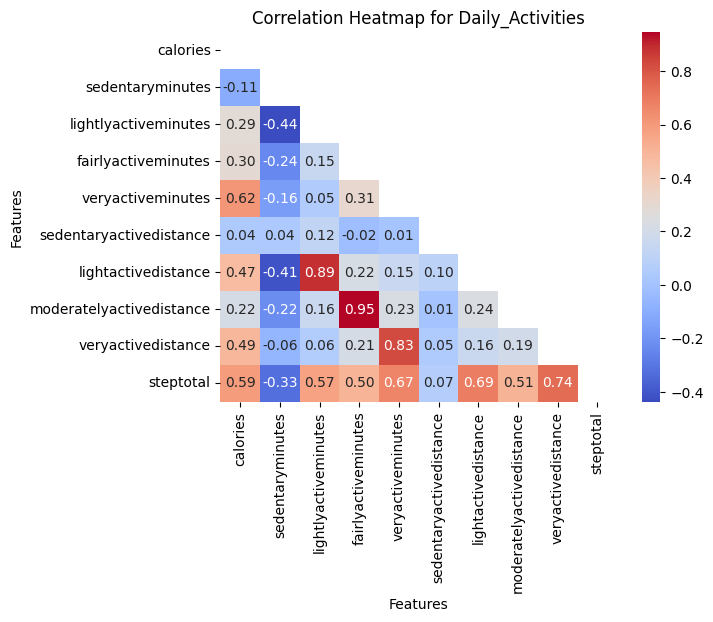

In [52]:
sb.heatmap(daily_activity_merged.iloc[:, 1:].corr(), annot=True, cmap="coolwarm", fmt=".2f", mask=np.triu(np.ones_like(daily_activity_merged.iloc[:, 1:].corr(), dtype=bool)))

plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap for Daily_Activities")

plt.show()

##Hourly Activities

In [53]:
hourly_activity_merged.head()

,id,activityhour_date,activityhour_time,calories,totalintensity,averageintensity
0,1503960366,2016-04-12,00:00:00,81,20,0.333
1,1503960366,2016-04-12,01:00:00,61,8,0.133
2,1503960366,2016-04-12,02:00:00,59,7,0.117
3,1503960366,2016-04-12,03:00:00,47,0,0.000
4,1503960366,2016-04-12,04:00:00,48,0,0.000


In [54]:
hourly_activity_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 22099 non-null  int64         
 1   activityhour_date  22099 non-null  datetime64[ns]
 2   activityhour_time  22099 non-null  object        
 3   calories           22099 non-null  int64         
 4   totalintensity     22099 non-null  int64         
 5   averageintensity   22099 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.2+ MB


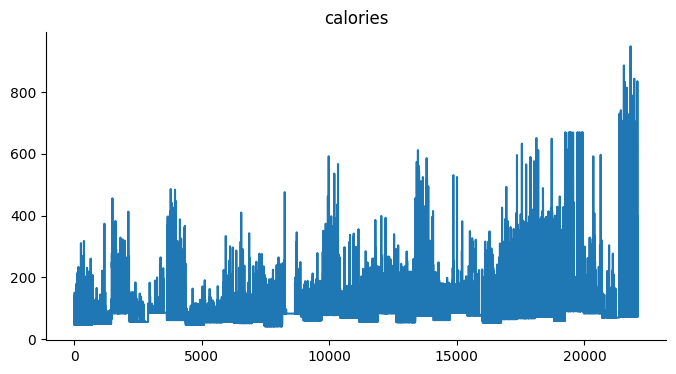

In [55]:
#Understanding Distribution of Calories
hourly_activity_merged['calories'].plot(kind='line', figsize=(8, 4), title='calories')
plt.gca().spines[['top', 'right']].set_visible(False)

In [92]:
#plotting Calories Vs Total Intensity
fig = px.scatter(hourly_activity_merged, x='calories', y='totalintensity', title='Calories vs Total Intensity',
                 labels={'calories': 'Calories', 'totalintensity': 'Total Intensity'})

fig.update_traces(marker=dict(size=10, opacity=0.8))

fig.update_layout(xaxis=dict(title='Calories'),
                  yaxis=dict(title='Total Intensity'),
                  title=dict(x=0.5, xanchor='center', y=0.95, yanchor='top'),
                  hovermode='closest')

fig.show()

In [95]:
# Expressing Calories on ID
fig = px.scatter(hourly_activity_merged, x='id', y='calories', title='ID vs Calories',
                 labels={'id': 'ID', 'calories': 'Calories'}, hover_data={'id': True, 'calories': True})

fig.update_traces(marker=dict(size=10, opacity=0.8))

fig.update_layout(xaxis=dict(title='ID'),
                  yaxis=dict(title='Calories'),
                  title=dict(x=0.5, xanchor='center', y=0.95, yanchor='top'),
                  hovermode='closest')

fig.show()

In [58]:
data = hourly_activity_merged

correlation_matrix = data.corr()
print(correlation_matrix)

                        id  calories  totalintensity  averageintensity
id                1.000000  0.197680        0.044610          0.044599
calories          0.197680  1.000000        0.896616          0.896613
totalintensity    0.044610  0.896616        1.000000          1.000000
averageintensity  0.044599  0.896613        1.000000          1.000000


<ipython-input-58-8de70497cd5c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


#**Insights:**
**Strong Positive Correlations:**
There is a strong positive correlation between:

*Calories burned and total intensity (0.90)*

*Calories burned and average intensity (0.90)*

*Total intensity and average intensity (1.00)*

**Weak Positive Correlation:**
There is a weak positive correlation between:

*ID and calories burned (0.20)*

**Interpretation:**

The positive correlations between calories burned and intensity metrics indicate that as the intensity of physical activity increases, the number of calories burned also tends to increase.
The perfect correlation (1.00) between total intensity and average intensity suggests that these variables are directly proportional and move in tandem.
The weak correlation between ID and calories burned suggests a minimal relationship between these two variables.

<ipython-input-59-31290dc27979>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(hourly_activity_merged.corr(), annot=True, cmap="coolwarm", fmt=".2f", mask=np.triu(np.ones_like(hourly_activity_merged.corr(), dtype=bool)))


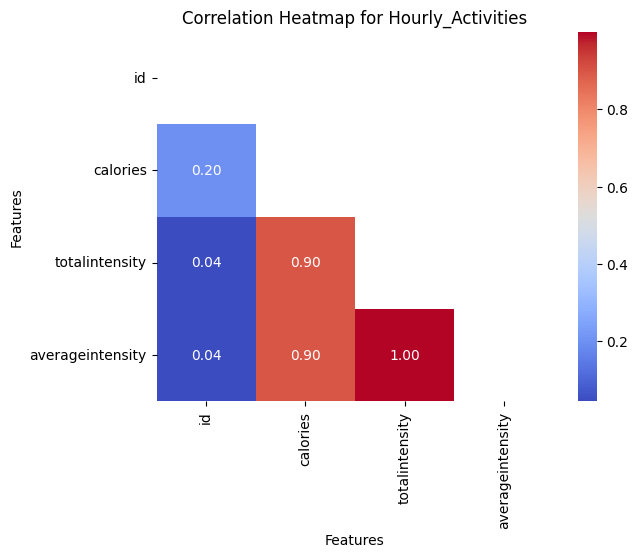

In [59]:
sb.heatmap(hourly_activity_merged.corr(), annot=True, cmap="coolwarm", fmt=".2f", mask=np.triu(np.ones_like(hourly_activity_merged.corr(), dtype=bool)))

plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap for Hourly_Activities")

plt.show()

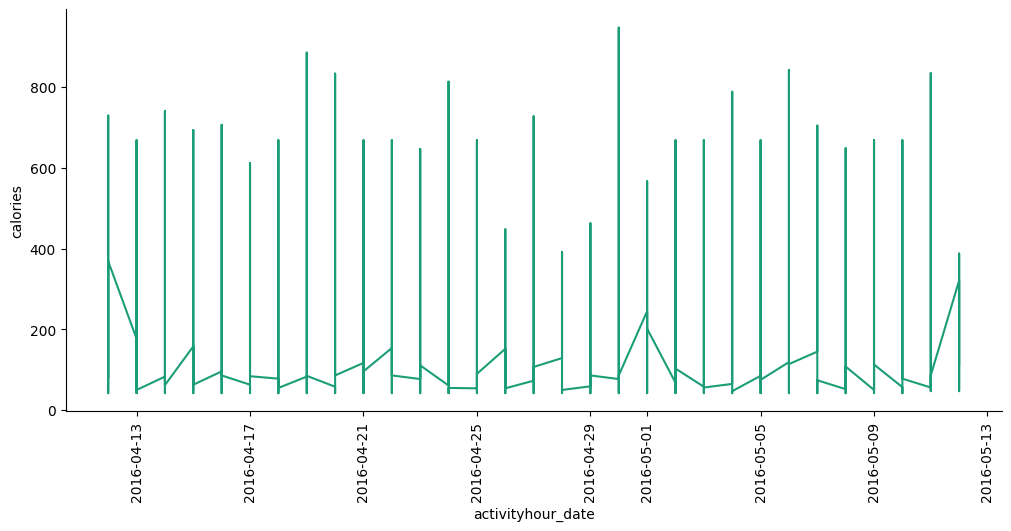

In [60]:
#plotting between Activity date Vs Calories Burnt
def _plot_series(series, series_name, series_index=0):
  palette = list(sb.palettes.mpl_palette('Dark2'))
  xs = series['activityhour_date']
  ys = series['calories']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = hourly_activity_merged.sort_values('activityhour_date', ascending=True)
_plot_series(df_sorted, '')
sb.despine(fig=fig, ax=ax)
plt.xlabel('activityhour_date')
plt.xticks(rotation=90)
_ = plt.ylabel('calories')

In [61]:
minute_activity_merged.head()

,id,activityminute_date,activityminute_time,calories,intensity,steps,mets_x,mets_y
0,1503960366,2016-04-12,00:00:00,0.7865,0,0,10,10
1,1503960366,2016-04-12,00:01:00,0.7865,0,0,10,10
2,1503960366,2016-04-12,00:02:00,0.7865,0,0,10,10
3,1503960366,2016-04-12,00:03:00,0.7865,0,0,10,10
4,1503960366,2016-04-12,00:04:00,0.7865,0,0,10,10


<ipython-input-63-f2d7cabf870b>:12: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


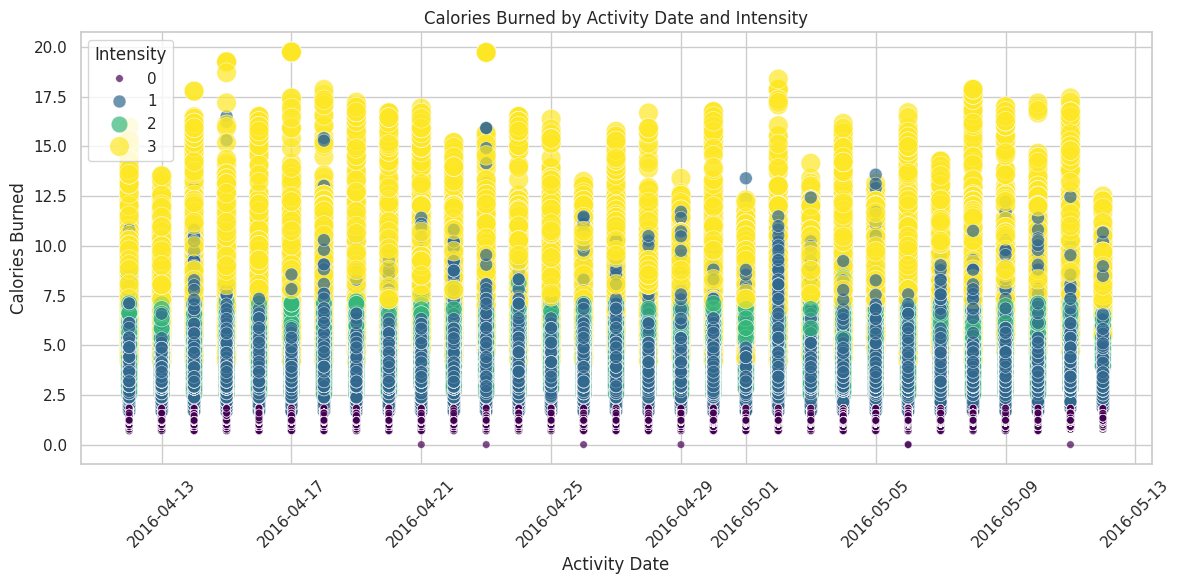

In [63]:
#Calories Burned by Activity Date and Intensity
sb.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sb.scatterplot(data=minute_activity_merged, x='activityminute_date', y='calories', hue='intensity', palette='viridis', alpha=0.7, size='intensity', sizes=(30, 200))

plt.title('Calories Burned by Activity Date and Intensity')
plt.xlabel('Activity Date')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45)
plt.legend(title='Intensity')

plt.tight_layout()
plt.show()

In [64]:
data = minute_activity_merged

correlation_matrix = data.corr()
print(correlation_matrix)

<ipython-input-64-9bfb477c7097>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


                 id  calories  intensity     steps    mets_x    mets_y
id         1.000000  0.141870   0.030334  0.034785  0.045925  0.045925
calories   0.141870  1.000000   0.890341  0.831061  0.955961  0.955961
intensity  0.030334  0.890341   1.000000  0.809397  0.939170  0.939170
steps      0.034785  0.831061   0.809397  1.000000  0.887007  0.887007
mets_x     0.045925  0.955961   0.939170  0.887007  1.000000  1.000000
mets_y     0.045925  0.955961   0.939170  0.887007  1.000000  1.000000


#**Insights:**
**Strong Positive Correlations:**
There is a strong positive correlation between:

*Calories burned and intensity (0.89)*

*Calories burned and METs (0.96)*

*Intensity and METs (0.94)*

**Moderate Positive Correlations:**
There are moderate positive correlations between:

*ID and calories burned (0.14)*

*ID and METs (0.05)*

*Calories burned and steps (0.83)*

*Intensity and steps (0.81)*

*METs and steps (0.89)*

**Interpretation:**

The strong positive correlations suggest that as one variable increases, the other tends to increase as well, indicating a linear relationship.
The moderate positive correlations imply that there is some relationship between the variables, but it is not as strong as the strong positive correlations.
Understanding these correlations can help identify factors that influence calorie expenditure, intensity of physical activity, and metabolic equivalents (METs), providing insights into overall activity levels and energy expenditure.

<ipython-input-65-81f27a94a2fe>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(minute_activity_merged.corr(), annot=True, cmap="coolwarm", fmt=".2f", mask=np.triu(np.ones_like(minute_activity_merged.corr(), dtype=bool)))


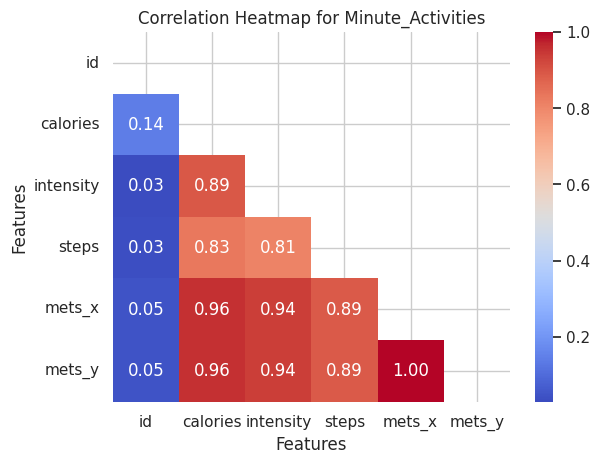

In [65]:
sb.heatmap(minute_activity_merged.corr(), annot=True, cmap="coolwarm", fmt=".2f", mask=np.triu(np.ones_like(minute_activity_merged.corr(), dtype=bool)))

plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap for Minute_Activities")

plt.show()

In [66]:
sleep_day.head()

,id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [91]:
# @title totalminutesasleep vs totaltimeinbed
fig = px.scatter(sleep_day, x='totalminutesasleep', y='totaltimeinbed', title='Total Minutes Asleep vs Total Time in Bed',
                 labels={'totalminutesasleep': 'Total Minutes Asleep', 'totaltimeinbed': 'Total Time in Bed'})

fig.update_traces(marker=dict(size=10, opacity=0.8))

fig.update_layout(xaxis=dict(title='Total Minutes Asleep'),
                  yaxis=dict(title='Total Time in Bed'),
                  title=dict(x=0.5, xanchor='center', y=0.95, yanchor='top'),
                  hovermode='closest')

fig.show()

In [68]:
weight_log_info.head()

,id,weight_date,weight_time,weightkg,weightpounds,fat,bmi,ismanualreport,logid
0,1503960366,2016-05-02,23:59:59,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,2016-05-03,23:59:59,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,2016-04-13,01:08:52,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,2016-04-21,23:59:59,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,2016-05-12,23:59:59,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [69]:
weight_log_info.corr()

<ipython-input-69-d21f338a54e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weight_log_info.corr()


,id,weightkg,weightpounds,fat,bmi,ismanualreport,logid
id,1.000000,0.351346,0.351346,1.0,-0.206405,-0.606458,-0.060964
weightkg,0.351346,1.000000,1.000000,1.0,0.735684,-0.874964,-0.225114
weightpounds,0.351346,1.000000,1.000000,1.0,0.735684,-0.874964,-0.225114
fat,1.000000,1.000000,1.000000,1.0,1.000000,NaN,-1.000000
bmi,-0.206405,0.735684,0.735684,1.0,1.000000,-0.326147,-0.235677
ismanualreport,-0.606458,-0.874964,-0.874964,NaN,-0.326147,1.000000,0.143830
logid,-0.060964,-0.225114,-0.225114,-1.0,-0.235677,0.143830,1.000000


<ipython-input-70-9aec76edde26>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(weight_log_info.corr(), annot=True, cmap="coolwarm", fmt=".2f", mask=np.triu(np.ones_like(weight_log_info.corr(), dtype=bool)))


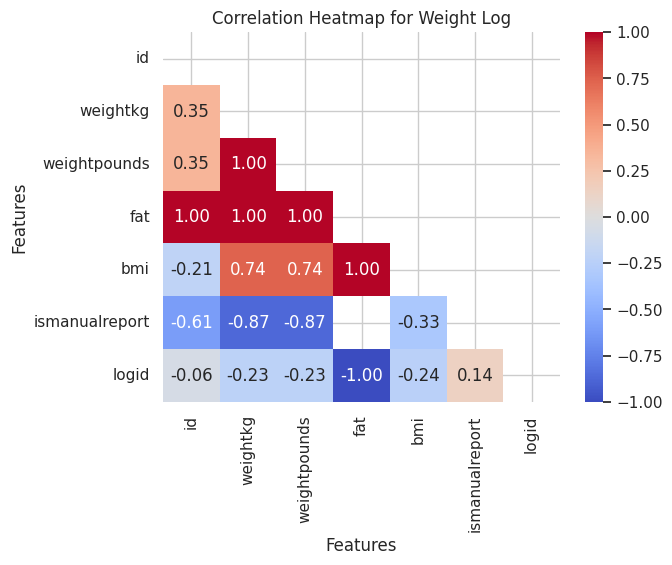

In [70]:
sb.heatmap(weight_log_info.corr(), annot=True, cmap="coolwarm", fmt=".2f", mask=np.triu(np.ones_like(weight_log_info.corr(), dtype=bool)))

plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap for Weight Log")

plt.show()

In [89]:
# Weight Stats
print(f"The highest weight is {weight_log_info['weightkg'].max()} kg")
print(f"The Avg weight is {round(weight_log_info['weightkg'].mean(),2)} kg")
print(f"The least weight is {round(weight_log_info['weightkg'].min(),2)} kg")

The highest weight is 133.5 kg
The Avg weight is 72.04 kg
The least weight is 52.6 kg


In [71]:
heartrate_second.head()

,id,heart_date,heart_time,value
0,2022484408,2016-04-12,07:21:00,97
1,2022484408,2016-04-12,07:21:05,102
2,2022484408,2016-04-12,07:21:10,105
3,2022484408,2016-04-12,07:21:20,103
4,2022484408,2016-04-12,07:21:25,101


In [72]:
heartrate_second.describe()

,id,value
count,2.483658e+06,2.483658e+06
mean,5.513765e+09,7.732842e+01
std,1.950224e+09,1.940450e+01
min,2.022484e+09,3.600000e+01
25%,4.388162e+09,6.300000e+01
50%,5.553957e+09,7.300000e+01
75%,6.962181e+09,8.800000e+01
max,8.877689e+09,2.030000e+02


In [86]:
# Heartrate Stats
print(f"Average Heartrate: {int(round(heartrate_second.value.mean(),0))}")
print(f"Least Heartrate: {int(round(heartrate_second.value.min(),0))}")
print(f"Highest Heartrate: {int(round(heartrate_second.value.max(),0))}")

Average Heartrate: 77
Least Heartrate: 36
Highest Heartrate: 203
